In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [175]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

In [176]:
train_df.head(5)

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [177]:
print(train_df.columns)
train_df.dtypes

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')


id                     int64
loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode                 int64
lOComment              int64
lOBlank                int64
locCodeAndComment      int64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
defects                 bool
dtype: object

In [178]:
print(f"Train data shape = {train_df.shape}")
print(f"Test data shape = {test_df.shape}")

Train data shape = (101763, 23)
Test data shape = (67842, 22)


In [179]:
print(f"Training y shape = {train_df['defects'].shape[0]}")
print(f"Test y shape = {test_df.shape[0]}")

Training y shape = 101763
Test y shape = 67842


In [180]:
print(train_df.info())
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)
train_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
20639,20639,95.0,11.0,1.0,9.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0.0,0.0,0.0,21.0,False
79262,79262,18.0,4.0,1.0,1.0,68.0,309.13,0.05,18.75,17.55,5792.61,0.10,321.81,13,1,1,0,10.0,8.0,44.0,30.0,7.0,False
68821,68821,26.0,5.0,1.0,4.0,89.0,448.95,0.07,14.29,32.74,6399.33,0.15,355.96,19,0,5,0,17.0,21.0,54.0,36.0,9.0,False


In [181]:
print(test_df.info())
test_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67842 entries, 0 to 67841
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 67842 non-null  int64  
 1   loc                67842 non-null  float64
 2   v(g)               67842 non-null  float64
 3   ev(g)              67842 non-null  float64
 4   iv(g)              67842 non-null  float64
 5   n                  67842 non-null  float64
 6   v                  67842 non-null  float64
 7   l                  67842 non-null  float64
 8   d                  67842 non-null  float64
 9   i                  67842 non-null  float64
 10  e                  67842 non-null  float64
 11  b                  67842 non-null  float64
 12  t                  67842 non-null  float64
 13  lOCode             67842 non-null  int64  
 14  lOComment          67842 non-null  int64  
 15  lOBlank            67842 non-null  int64  
 16  locCodeAndComment  678

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
51569,153332,11.0,2.0,1.0,1.0,18.0,70.31,0.24,4.17,15.07,331.08,0.02,18.39,9,0,0,0,7.0,6.0,11.0,7.0,3.0
50210,151973,20.0,2.0,1.0,1.0,71.0,351.75,0.08,12.38,28.32,4394.31,0.12,244.13,15,0,3,0,14.0,16.0,46.0,25.0,3.0
48592,150355,41.0,6.0,4.0,6.0,130.0,684.82,0.05,18.67,37.67,14589.43,0.23,810.52,30,0,9,0,16.0,24.0,84.0,56.0,11.0


In [182]:
print(f"Missing value count in training data = {train_df.isna().sum()}")
print(f"Missing value count in test data = {test_df.isna().sum()}")

Missing value count in training data = id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64
Missing value count in test data = id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndCommen

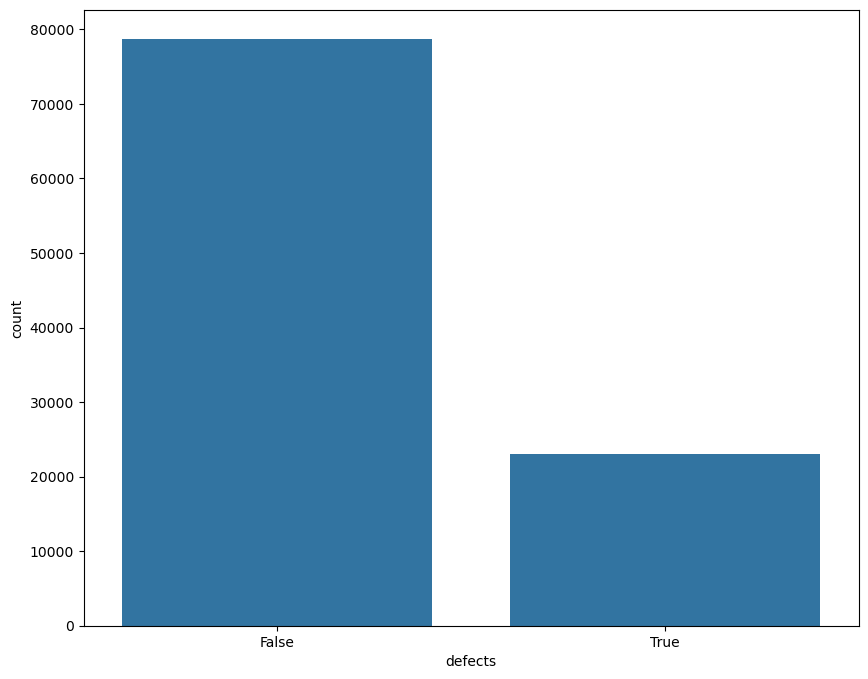

Defect ----- 22.664426166681405
No Defect ----- 77.33557383331859


In [183]:
defects = train_df['defects'].value_counts()[1]
no_defect = train_df['defects'].value_counts()[0]
defect_per = defects / train_df.shape[0] * 100
no_defect_per = no_defect / train_df.shape[0] * 100

plt.figure(figsize=(10,8))
sns.countplot(x= 'defects', data=train_df)
plt.xlabel('defects')

plt.show()
print(f"Defect ----- {defect_per}")
print(f"No Defect ----- {no_defect_per}")

In [184]:
train_df.describe()


,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,0.179164,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,0.421844,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,0.030000,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,0.080000,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,0.190000,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,26.950000,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


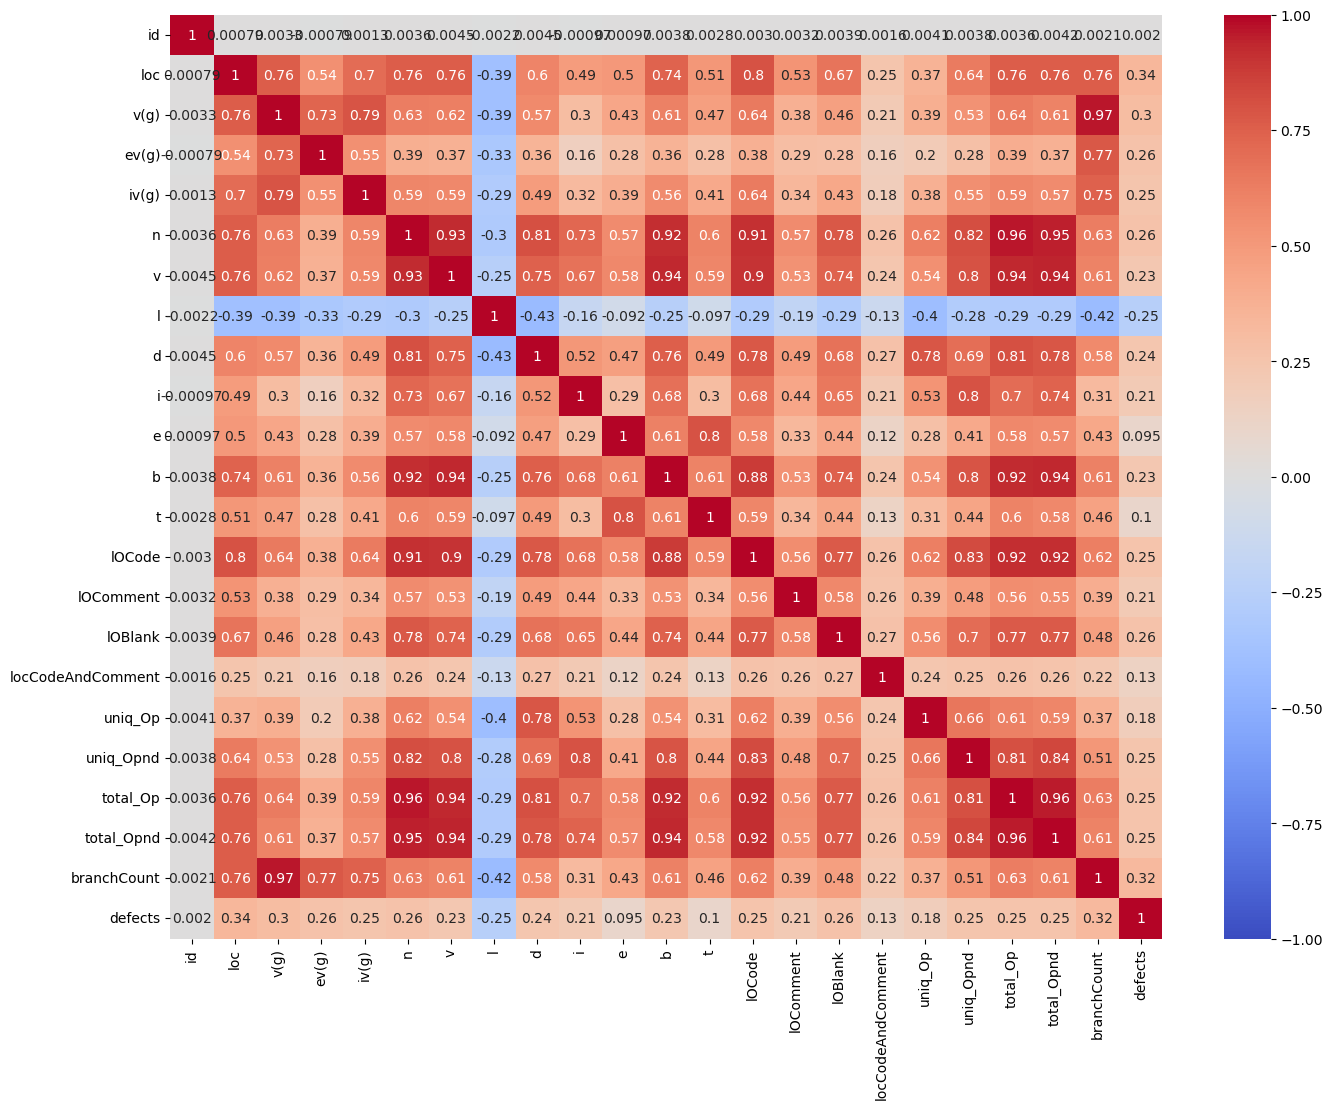

In [185]:
plt.figure(figsize=(16,12))
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin = -1, vmax= 1)
plt.show()

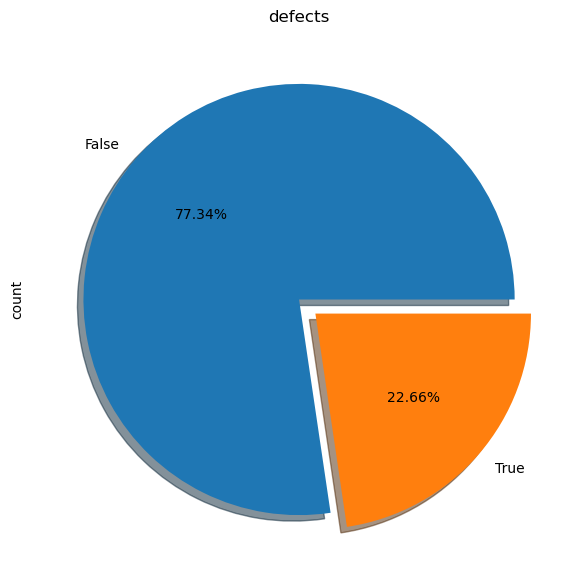

In [186]:
fig, ax = plt.subplots(figsize=(7,7))
train_df['defects'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.2f%%", shadow=True)
ax.set_title('defects')
plt.show()

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [188]:
features = train_df.drop(columns=['id','defects']).columns.tolist()
len(features)

21

In [189]:
X_train, X_val, y_train, y_val = train_test_split(train_df[features], train_df['defects'], test_size=0.2, random_state=42)
print(f'train samples : {len(X_train)}')
print(f'validation samples : {len(X_val)}')
print(f'target proportion : {sum(y_train) / len(y_train):.4f}')

train samples : 81410
validation samples : 20353
target proportion : 0.2277


In [190]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : [10,100,250,500],
          'criterion' : ['gini','entropy'],
          'max_depth' : [1,5,10,25],
          'min_samples_split' : [2,5,10],
          'min_samples_leaf' : [1,5,10]}

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid=params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs = -1)
# grid.fit(X_train, y_train)


In [191]:
# print(grid.best_estimator_.get_params())
# {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

In [192]:
best_rf_params = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
best_rf_model = RandomForestClassifier(**best_rf_params)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)

In [193]:
def evaluate_model(model, X_test, y_test):
    # prediction
    y_hat_test = model.predict(X_test)

    # classification report
    print('             Classification Report')
    print('---------------------------------------------')
    print(classification_report(y_test, y_hat_test))

    # confusion matrix
    fig, axes = plt.subplots(figsize=(12, 8), ncols=2)
    cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion Matrix')

    # ROC-AUC Curve
    y_score = model.predict_proba(X_test)[:, 1]  # Assuming binary classification
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC-AUC Curve')
    axes[1].legend(loc='lower right')
    axes[1].grid()

    fig.tight_layout()
    plt.show()

             Classification Report
---------------------------------------------
              precision    recall  f1-score   support

       False       0.84      0.93      0.88     15825
        True       0.61      0.37      0.46      4528

    accuracy                           0.81     20353
   macro avg       0.72      0.65      0.67     20353
weighted avg       0.79      0.81      0.79     20353



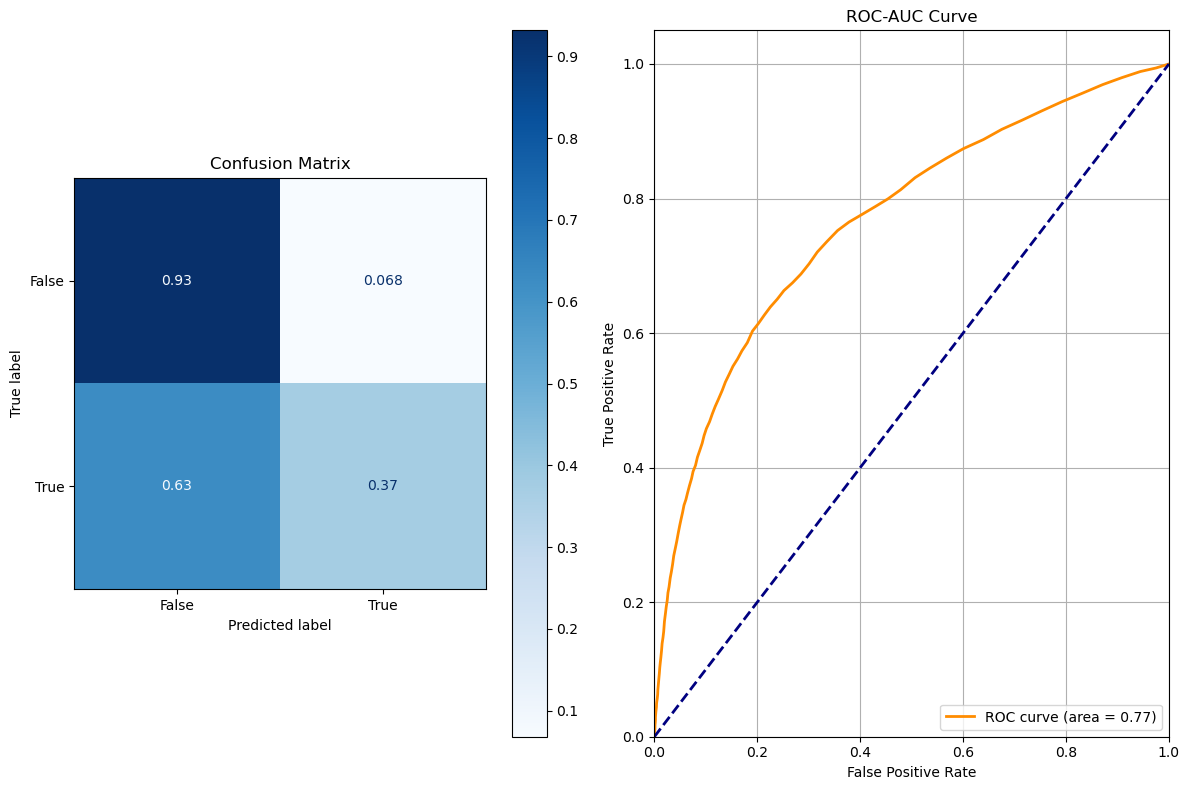

In [194]:
# Base model evaluation

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_val, y_val)

             Classification Report
---------------------------------------------
              precision    recall  f1-score   support

       False       0.84      0.94      0.89     15825
        True       0.64      0.39      0.49      4528

    accuracy                           0.82     20353
   macro avg       0.74      0.66      0.69     20353
weighted avg       0.80      0.82      0.80     20353



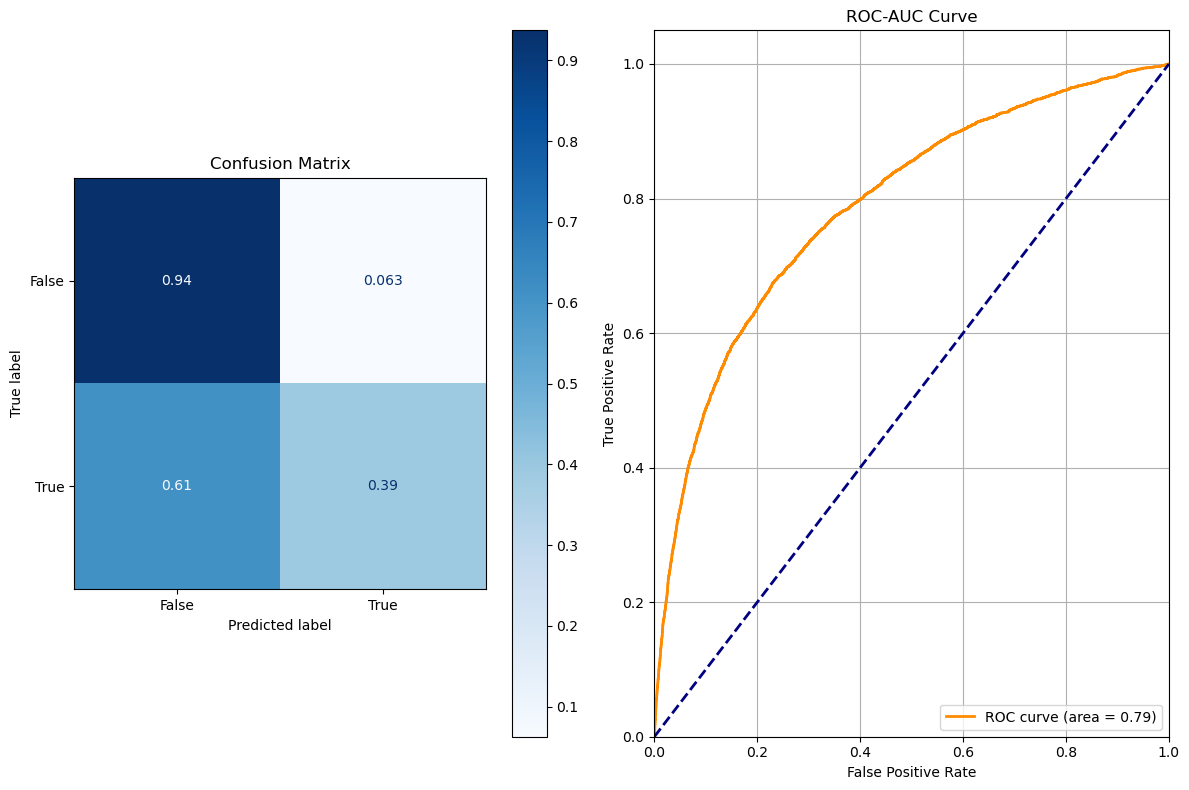

In [195]:
# Best model evaluation
evaluate_model(best_rf_model, X_val, y_val)

             Classification Report
---------------------------------------------
              precision    recall  f1-score   support

       False       0.84      0.94      0.89     15825
        True       0.64      0.39      0.49      4528

    accuracy                           0.82     20353
   macro avg       0.74      0.66      0.69     20353
weighted avg       0.80      0.82      0.80     20353



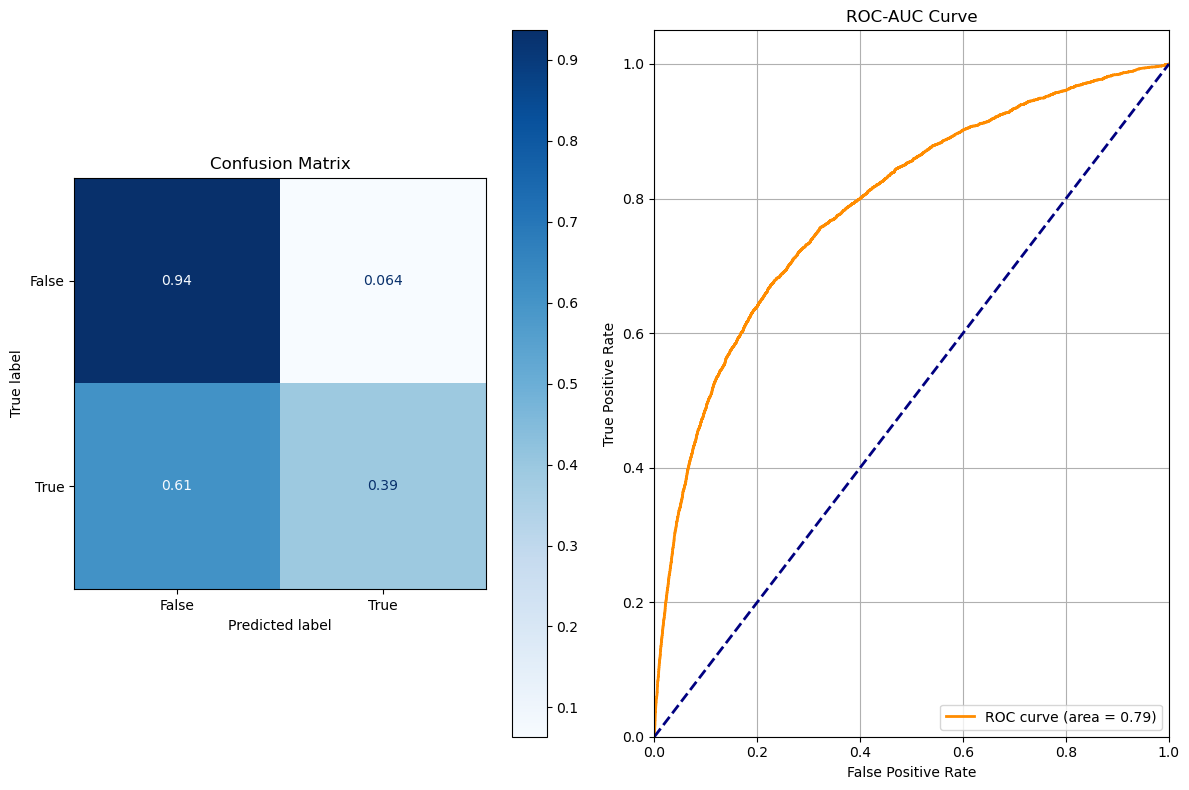

In [196]:
param_gridd = {
    'n_estimators' : [100, 200, 300, 500],
    'learning_rate' : [0.01, 0.1, 0.5],
    'max_depth' : [3, 4, 5, 10]
}

model = XGBClassifier(random_state=42)
grid_search = GridSearchCV(model, param_gridd, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

evaluate_model(best_xgb, X_val, y_val)

In [197]:
X_testt = test_df.drop(['id'], axis=1)
predictions = best_xgb.predict_proba(X_testt)
sample_sub['defects'] = predictions
sample_sub.to_csv("submission.csv", index=False)
